# Model validation - automotive brand dataset
 
Let's now validate the model accross the whole dataset. As evaluation is pretty slow with the brute-force matching,
we will use models specialised to each brand, rather than a general model that can assess every brand. This will naturally
supress the false-positive rate, so this must be kept in mind.

We start with some general initialisation:

In [4]:
import load_data as ld
import kpm_model as model
from model_validation import study_matches
import cv2, os

# Read in the BelgaLogos dataset, filtered by acceptable bounding-boxes and 'OK' flag
metadata = ld.read_metadata()
metadata = ld.filter_by_boundingbox(metadata, 10, 800)
metadata = metadata[metadata.ok == True]

and write a function that generates results from `study_matches` for each brand, summarising them in a dictionary:

In [6]:
def validation_run(metadata, logo_set):
    """Perform a validation run over a list of logos, returning a results dictionary"""
    # Initialise a dictionary for results
    results_dict = {}
    for logo_name in logo_set:
        # Get the logo image
        logo_filename = os.path.join("data", "logos", logo_name.lower() + '.jpg')
        logo_image = cv2.imread(logo_filename)

        # Initialise model
        SIFT = cv2.xfeatures2d.SIFT_create()
        SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)
        SIFTMatcher.add_template(logo_name, logo_image)

        # Get target dataset
        dataset = metadata[(metadata.brand == logo_name)]

        #Perform study
        results_dict[logo_name] = study_matches(dataset, SIFTMatcher)
    return results_dict

Finally we initialise our brand lists and perform the validation runs

In [9]:
# Initialise a list of car and clothing logo brands
car_logos      = ["Citroen", "Citroen-text", "Ferrari", "Kia", "Mercedes", "Peugeot"]
clothing_logos = ["Adidas", "Airness", "Gucci", "Nike", "Puma", "Puma-text", "Reebok", "Umbro"]

In [11]:
%%time 
car_results = validation_run(metadata, car_logos) # Run over car logos

CPU times: user 11min 42s, sys: 34.9 s, total: 12min 17s
Wall time: 10min 19s


In [12]:
%%time 
clothing_results = validation_run(metadata, clothing_logos) # Run over clothing logos

CPU times: user 12min 36s, sys: 1min 15s, total: 13min 52s
Wall time: 10min 52s


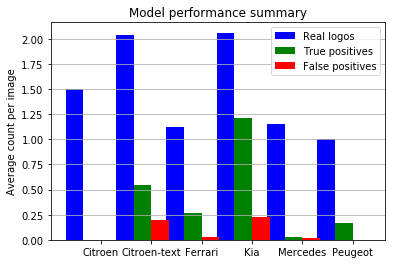

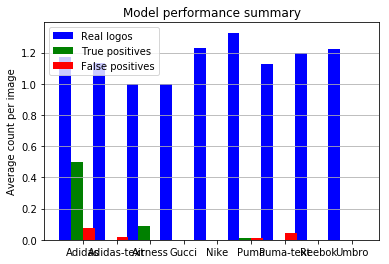

In [14]:
from model_validation import validation_histogram
from matplotlib import pyplot as plt
# Plot validation histograms
plt.show(validation_histogram(car_results))
plt.show(validation_histogram(clothing_results))